# Predict Survival on Titanic Datasets Using Classification Methods(Part 2)

## 3. Apply Machine Learning Algorithms
In module 1, I started with exploratory data analysis (EDA) in order to understand the problem and find the hidden information inside each feature. After that I reengineer the existing features to modify them and create new features to better explain the dataset to machine learning model. 

In this module, our goal is to identify the relationship between survived or not(target variable) with other features. Please see the table of content as follows:

### Table of Content
* 3.0 Import Packages
* 3.1 Read Dataset
* 3.2 Dummy Variables Encoding
* 3.3 Feature Normalization(Feature Scaling)
* 3.4 Split Dataset
* 3.5 Introduction of Evaluation Matrics
* 3.6 Machine Learning Methods
* 3.7 Model Comparison
* 3.8 Conclusion

###  3.0 Import Packages

In [1]:
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# Parameter Tuning
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

### 3.1 Read Dataset 

In [2]:
Data = pd.read_csv("Titanic_Data_Preparation.csv") 
TestIndex = pd.read_csv("TestDataIndex.csv",header = None,names=['0','Index'])
Data.shape#1309 x 9
Data.head()

,PassengerId,Age,Embarked,Fare,Pclass,Sex,Survived,Title,NumFamily
0,1,22.0,S,7.2500,3,male,0,Mr,1
1,2,38.0,C,71.2833,1,female,1,Mrs,1
2,3,26.0,S,7.9250,3,female,1,Miss,0
3,4,35.0,S,53.1000,1,female,1,Mrs,1
4,5,35.0,S,8.0500,3,male,0,Mr,0


### 3.2 Dummy Variables Encoding
As we can see above, there are several categorical variables which are stored as text values, including column 'Sex' (male, female), 'Embarked' (S, C, Q) and 'Title' (Mr, Mrs, Miss, Master, Others). Regardless of what the value is used for, the challenge is determining how to use data in the analysis. As we know, many machine learning algorithms can deal with categorical variables without any manipulation but there are also some algorithms cannot do. How to turn these text attributes into numarics for further processing? Read http://pbpython.com/categorical-encoding.html if you want to know more methods about dealing with categorical variables.

At the beginning, we may think of converting categorical variables into ordinal numbers, however, categorical variables cannot tell us which levels should be more important than others, but ordinal numbers can. I think this method will make algorithms bias. 

In order to unify our data and easy to do comparison based on the ML results, we will create dummy variables to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. To avoid multicolinearity (Dummy Variable Trap), I plan to remove the first dummy variables of all categorical variables, such as 'Sex_female', 'Title_Master' and 'Embarked_C'

In [3]:
Data0 = pd.get_dummies(Data,columns = ['Sex','Title','Embarked','Pclass'])
Data1 = Data0.drop(['Sex_female', 'Title_Master', 'Embarked_C','Pclass_1'],axis = 1)
Data1.head()

,PassengerId,Age,Fare,Survived,NumFamily,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,7.2500,0,1,1,0,1,0,0,0,1,0,1
1,2,38.0,71.2833,1,1,0,0,0,1,0,0,0,0,0
2,3,26.0,7.9250,1,0,0,1,0,0,0,0,1,0,1
3,4,35.0,53.1000,1,1,0,0,0,1,0,0,1,0,0
4,5,35.0,8.0500,0,0,1,0,1,0,0,0,1,0,1


### 3.3 Feature Normalization(Feature Scaling)
We also notice there are some features are in different scales, such as column 'Age' and 'Fare'. These two features are numerical variables. When we apply ML methods like KNN, SVM, Neural Networks, etc. different scales of input features may give different contributions to the ML algorithms and then cause problems. So transform the input features into same scale is necessary. We may consider to use mean-std normalization 
<img src = "normalized.png" width = 280>
or min-max normalization
<img src = "minmax.png" width = 340>
as follows:

In [4]:
Data2 = Data1.copy()
#Data2.Age=(Data2.Age-Data2.Age.mean())/Data2.Age.std()
#Data2.Fare=(Data2.Fare-Data2.Fare.mean())/Data2.Fare.std()
Data2.Age=(Data2.Age-Data2.Age.min())/(Data2.Age.max()-Data2.Age.min())
Data2.Fare=(Data2.Fare-Data2.Fare.min())/(Data2.Fare.max()-Data2.Fare.min())

Data2.head()

,PassengerId,Age,Fare,Survived,NumFamily,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0.273456,0.014151,0,1,1,0,1,0,0,0,1,0,1
1,2,0.473882,0.139136,1,1,0,0,0,1,0,0,0,0,0
2,3,0.323563,0.015469,1,0,0,1,0,0,0,0,1,0,1
3,4,0.436302,0.103644,1,1,0,0,0,1,0,0,1,0,0
4,5,0.436302,0.015713,0,0,1,0,1,0,0,0,1,0,1


### 3.4 Split Dataset

In module 1, we did explanatory data analysis on whole dataset. Since the dataset is ready now, we will split the dataset, train models use a number of machine learning algorithms on train set and do evaluation & model comparison to find the optimal algorithm based on evaluation metric scores on test set. 

In [5]:
Testlist = TestIndex.Index.tolist()
Train = Data2.loc[~Data2.PassengerId.isin(Testlist)]
Test_Final = Data2.loc[Data2.PassengerId.isin(Testlist)]
print('Dimension of trainset is',Train.shape)#891 x 14
print('Dimension of testset is: ',Test_Final.shape)#418 x 14
Train.dtypes.index

Dimension of trainset is (891, 14)
Dimension of testset is:  (418, 14)


Index(['PassengerId', 'Age', 'Fare', 'Survived', 'NumFamily', 'Sex_male',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')

### 3.5 Introduction of Evaluation Matrics
Before using multiple ML algorithms, let's talk about Evaluation Matrics in advance. How to define how effective an algorithm is? If it is hard to understand, maybe we can think about a simple question: How to tell if a restaurant is a good one. Are we judging the restaurants on the basis of their hotpot? Sushi? Ramen? Service? Or even In-store decoration?

This is what metrics do. As we know, Machine Learning algorithms work on constructive feedback principle. If we apply ML algorithms, get feedback from the metrics, make improvement(try other tuning parameters) and continue until you achieve a desirable criterion. We use evaluation matrics to explain the performance of an algorithm. Different performance metrics are used to evaluate different machine learning algorithms. In House Sale in King County project, as it is a regression problem, we use RMSE as metric. Titanic Survival project is a binary classification problem, so we will implement some other type of metrics, such as **Confusion Matrix**, **Accuracy**, **Specificity**, **Sensitivity**,  **Precision-Recall**, **F1-score**, **ROC-AUC**, etc.

<img src = "confusionmatrix.png" width = 550>

In classification problem, after prediction, we can compare the predicted labels with the true labels to see whether our prediction is accurate or not. **Confusion Matrix** is one of the most intuitive and easiest metrics used for finding the correctness and accuracy of the model. The Confusion matrix itself is not a performance measure, but almost all of the performance metrics are based on Confusion Matrix and the numbers inside. 

**True Positives** are the cases when the actual class of the data point was True and the predicted is also True. **True Nagetives** are the cases when the actual class of data was False and the predicted is also Flase. **False Positives** are the cases when the actual class of the data point was False and the predicted is True. **False Negatives** are the cases when the actual class of data was True and the predicted is False.

Besides, there are some other matrics based on confusion matrix:

* **False Positive Rate** (Type I Error): b/(b+d), 
* **False Negative Rate** (Type II Error): c/(a+c),
* **Specificity** (True Negative RATE): Number of items correctly identified as negative out of total negatives
**Specificity** = d/(b+d) = 1 - Recall
* **Sensitivity** (True Positive Rate/Recall): Number of items correctly identified as positive out of total true positives
**Sensitivity** = a/(a+c)
* **Accuracy**: Percentage of total items classified correctly
**Accuracy** = (a+d)/(a+b+c+d)
* **Precision**:  Number of items correctly identified as positive out of total items identified as positive
**Precision** = a/(a+b)
* **Recall**: Number of items correctly identified as positive out of total true positives
**Recall** = a/(a+c)
* **F1-score**: A harmonic mean of precision and recall
**F1** = 2*Precision*Recall/(Precision + Recall)
* **ROC-AUC** ROC(receiver operating characteristic) curve a plot which illustrates the diagnostic ability of a classification algorithm **at different classification thresholds**. X axis is false positive(sensitivity) rate and y axis is true positive rate(1-specificity). ROC-AUC measures the entire two-dimensional area underneath the entire ROC curve  from (0,0) to (1,1). AUC larger, the algorithm predict better.

<img src = "ROCAUC.png" width = 350>

So many different metrics listed above. **When to use what. It may be a problem we need to talk about.**

##### False Positive/False Negative:
We know that there will be some error associated with every model that we used for predicting the true class of target variable. This will result in False Positive and False Nagetive. It depends on different needs of the problem to determine which one should be minimized.

(1) Missing a cancer patient will be a huge mistake. If we want to correctly identify all cancerous patients from people, in order to catch all cancer cases, minimize FALSE NAGETIVE is necessary. 

(2) However, if we want to classify whether an email is spam or not, it seems worse to classify a important email to spam than classify a spam email as important. In this situation, minimize FALSI POSITIVE is nice.

##### Accuracy
Accuracy is a good measure when the target variable classes are nearly balanced. **But if target variable is not quite balanced, accuracy will not be a good metric.** For example, if we want to detect survival from 100 people and find only 5 are survived from Titanic disaster. Even though the model is terrible enough, all people are labeled as 'not-survived', the accuracy is still 95% high. In this situation, accuracy is not a good metric.

##### ROC-AUC
Similar as accuracy, ROC-AUC is also a good measure when the target variable classes are nearly balanced. **But if target variable is not quite balanced, it will not be a good metric either.** Here is a kaggle example: https://www.kaggle.com/lct14558/imbalanced-data-why-you-should-not-use-roc-curve. To solve this problem, we can use Precision-Recall AUC instead of ROC-AUC.

##### Precision and Recall
Precision is a measure which tells us what proportion of people we predict as survived, acurally survived. Precision gives us information about performance with respect to false positive. if we want to minimize False Positive, make precision close to 100%.

Recall is a measure which returns what proportion of truly survived people was predicted by the algorithm as survived. Recall gives us information about a classifier's performance with respect to false negative. If we focus more on minimizing False Negative, we want recall close to 100%.

The precision-recall plot is shown as follows:

<img src = "PRAUC.png" width = 250>

**Comparing with ROC curve, precision-recall curve seems not effected much by inbalanced target variable.** Please see a comparison example in https://www.kaggle.com/general/7517#post41179.

<img src = "PRAUCexample.png" width = 650>

##### F1-score
We use a balanced mean which is called harmonic mean to combine precision and recall together. Harmonic mean is a kind of an average when x and y are equal. But if x and y are different, marmonic mean returns a smaller one, giving the model an appropriate score rather than just an arithmetric mean.

<img src = "harmonic.png" width = 180>

We usually use both PR-AUC and F1-score when the target variable is inbalanced.

In our Titanic project, which metric should we use? Let's check the balance of column 'Survived' at first:

In [6]:
Train_y = Train.Survived
Train_X = Train[[ 'Age', 'Fare', 'NumFamily', 'Sex_male',
                 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
                 'Embarked_S', 'Pclass_2', 'Pclass_3']]
#Train_X = Train[['PassengerId', 'Age', 'Fare', 'NumFamily', 'Sex_male', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Others','Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']]
Test_Final_y = Test_Final.Survived
Test_Final_X = Test_Final[['Age', 'Fare', 'NumFamily', 'Sex_male',
                 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
                 'Embarked_S', 'Pclass_2', 'Pclass_3']]

print(Train_y.value_counts())
print('Column Survived is balanced in train set')

print(Test_Final_y.value_counts())
print('Column Survived is balanced in test set')

0    549
1    342
Name: Survived, dtype: int64
Column Survived is balanced in train set
0    266
1    152
Name: Survived, dtype: int64
Column Survived is balanced in test set


In [7]:
# # Feature Importance

# import numpy as np
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(Train_X, Train_y)

# Y_prediction = random_forest.predict(Test_Final_X)

# importances = pd.DataFrame({'feature':Train_X.columns,'importance':np.round(random_forest.feature_importances_,3)})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
# importances.plot.bar()

# #random_forest.feature_importances_

As 'Survived' is balanced in Titanic dataset, accuracy will be a good choice.

### 3.6 Machine Learning Methods

Since the problem we are trying to solve is a classification problem. We are going to use bunch of classification algorithms to get the best prediction. I will use the following models and describe them along the way to give a better perspective.
<img src = "Classification.png" width = 500>

#### 3.6.1 Naive Bayes
Naive Bayes algorithm is a simple but effective algorithm for classification based on Bayes' Theorem with an assumption of independence among predictor features. Given a new vector of features, our goal is to classify whether a passenger could be surveved or not, i.e. P(Survival|f1, ..., fn). We apply bayes law(equation 1) as follows:
<img src = "bayeslaw1.png" width = 350>
As P(Survival) is easy to calculate, and P(f1, ..., fn) is not related to 'Survived', we only need to consider P(f1, ..., fn | Survival). Applying Maximum Likelihood Estimation(MLE) to solve the problem, we have to choose 'Survival' value(0/1) for which P(f1, ..., fn|Survival) is the highest. Please see the equation 2:

<img src = "bayeslaw0.png" width = 280>
Using conditional probability formula and the independent assumption, we have equation 3:
<img src = "bayeslaw2.png" width = 400>

Well, a problem is coming: How to model the probability function P(fi|Survived)? 
* If fi is continous feature, it follows Gaussian(Normal) Distribution. 
* If fi is discrete feature, it follows Nultinomial Distribution.
* If fi is binary feature, it follows Bernoulli Distribution.

Combining the Distribitons together, let's partially differentiate the above equation 3 with respect to the parameters such as mean and std. In order to find maximum likelihood estimators let’s equal above value to 0, then we will calculate the parameters. We do prediction and calculate the probability of Survival given a vector of features after that.

In our Titanic project, we fit a naive bayes model in train dataset, do prediction, set a threshold to classify the probability into 0 or 1 and calculate evaluation metrics in test set. BEFORE these steps, the first thing is to double check the assumption of naive bayes: **Feature Independence**

To check multicolinearity, we choose VIF(variance inflation factor) score. VIF score explains how much amount multicollinearity (correlation between predictors) exists in a regression analysis.
* If VIF = 1: Not Correlated
* If 1 < VIF < 5: Moderately Correlated
* If VIF >=5: Highly Correlated

We drop variables whose VIF is more than 5:

In [8]:
# Check Multicolinearity BY VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [9]:
Train_X1 = calculate_vif_(Train_X)
Train_X1.head()

dropping 'Sex_male' at index: 3
dropping 'Title_Mr' at index: 4
Remaining variables:
Index(['Age', 'Fare', 'NumFamily', 'Title_Miss', 'Title_Mrs', 'Title_Others',
       'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')


,Age,Fare,NumFamily,Title_Miss,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.273456,0.014151,1,0,0,0,0,1,0,1
1,0.473882,0.139136,1,0,1,0,0,0,0,0
2,0.323563,0.015469,0,1,0,0,0,1,0,1
3,0.436302,0.103644,1,0,1,0,0,1,0,0
4,0.436302,0.015713,0,0,0,0,0,1,0,1


In [10]:
Train_Nomulticol = Train.drop(['Sex_male','Title_Mr'],axis = 1)
Train_Nomulticol = Train_Nomulticol.set_index('PassengerId')
Train_Nomulticol.head()

,Age,Fare,Survived,NumFamily,Title_Miss,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,0.273456,0.014151,0,1,0,0,0,0,1,0,1
2,0.473882,0.139136,1,1,0,1,0,0,0,0,0
3,0.323563,0.015469,1,0,1,0,0,0,1,0,1
4,0.436302,0.103644,1,1,0,1,0,0,1,0,0
5,0.436302,0.015713,0,0,0,0,0,0,1,0,1


In [11]:
traindata, testdata = train_test_split(Train_Nomulticol, random_state=0,train_size = 0.8)
#traindata.shape#712 x 11
#testdata.shape # 179 x 11
traindata_y = traindata.Survived
traindata_X = traindata[['Age', 'Fare', 'NumFamily', 'Title_Miss', 'Title_Mrs','Title_Others', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']]

testdata_y = testdata.Survived
testdata_X = testdata[['Age', 'Fare', 'NumFamily', 'Title_Miss', 'Title_Mrs','Title_Others', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']]

In [12]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(traindata_X, traindata_y)
y_pred = gaussian.predict(testdata_X)
gaussianNB_accy = round(accuracy_score(y_pred, testdata_y), 3)
print('Confusion Matrix: ')
print(pd.crosstab(testdata_y, y_pred)) # Confusion matrix
#print( confusion_matrix(testdata_y, y_pred))
print('-----------------------------------------------------------')
print("Accuracy: ",round(gaussianNB_accy * 100,2),'%')
print('-----------------------------------------------------------')
print("Precision: ", round(precision_score(testdata_y, y_pred),2))
print('-----------------------------------------------------------')
print("Recall: ",round(recall_score(testdata_y, y_pred),2))
print('-----------------------------------------------------------')
print('F1 Score: ',round(f1_score(testdata_y, y_pred),2))

Confusion Matrix: 
col_0      0   1
Survived        
0         85  25
1         18  51
-----------------------------------------------------------
Accuracy:  76.0 %
-----------------------------------------------------------
Precision:  0.67
-----------------------------------------------------------
Recall:  0.74
-----------------------------------------------------------
F1 Score:  0.7


From evaluation results above we can see:

**Confusion Matrix:** 51 passengers are correctly classified as survived, 85 passengers are correctly classified as unsurvived, 25 people wrongly classified as survived, 18 people wrongly classified as unsurvived. 

**Precision:** Naive Bayes classification performs well with an accuracy of 76%. It means Naive Bayes model predict 76% accurately. NB model predicts 67% of a time, a passenger survival correctly. In other words, if we say a passenger is survived, it is 67% probability that my prediction is correct. 

**Recall:** The recall tells us that it predicted the survival of 74% the people who actually survived, in other words, 74% survived passengers are classified correctly as survived. 

We will also take a look at the ROC Curve and Precision-recall Curve as follows: 

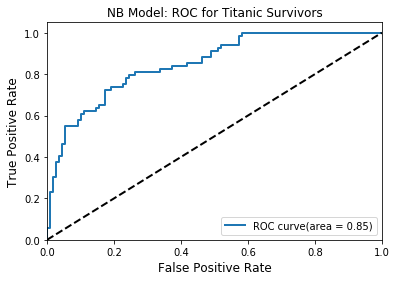

In [13]:
y_score = gaussian.predict_proba(testdata_X)[:,1]

# ROC Curve
FPR, TPR, threshold = roc_curve(testdata_y, y_score)
ROC_AUC = auc(FPR, TPR)
#print('ROC AUC: ',round(ROC_AUC,2))
plt.figure(figsize =[6,4])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('NB Model: ROC for Titanic Survivors', fontsize= 12)
plt.legend(loc="lower right")
plt.show()

We introduce ROC Curve in evaluation matrics section. ROC(receiver operating characteristic) curve is a plot which illustrates the diagnostic ability of a classification algorithm at different classification thresholds. X axis is false positive rate(sensitivity) and y axis is true positive rate(1-specificity). 

For different threshold, we will classify predicted probability into different groups, for example, if predprob = 0.76 and threshold = 0.5, then survival prediction should be 'Yes', however, if threshold = 0.8, then survival prediction should be 'No'. Each threshold returns us different confusion matrix, different FPR and TPR.

The black line in the middel represents a purely random classifier (e.g a coin flip), so classifier should be as far away from it as possible. ROC AUC is 85%, it seems NB is a good model, much better than random guess.

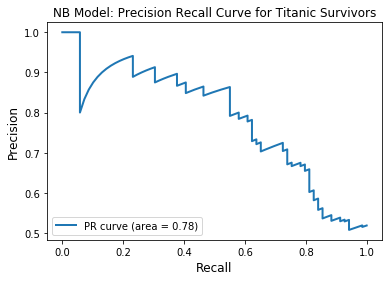

In [14]:
y_score = gaussian.predict_proba(testdata_X)[:,1]

# Precision-recall Curve
precision, recall, A = precision_recall_curve(testdata_y, y_score)
#pd.DataFrame({'precision':precision[:133],'recall':recall[:133],'threshold':A})
PR_AUC = auc(recall, precision)
#print('PR AUC: ',round(PR_AUC,2))
plt.figure(figsize=[6,4])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('NB Model: Precision Recall Curve for Titanic Survivors', fontsize=12)
plt.legend(loc="lower left")
plt.show()

Usually, Naive Bayes is an easy, fast and simple to implement classification method and works well for small dataset. Naive Bayes also performs well even if the Naive Assumption is not perfectly met(Assumption is violated, NB is still optimal). This is the reason why it is always be used as a baseline during model comparison. 

However, when we use Naive Bayes, we usually need to remove correlated features in advance to avoid multicolinearity. If a categorical variable has a category in test data set which was not observed in training data set, then the model will assign a zero probability. It will not be able to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation. Sklearn applies Laplace smoothing by default when you train a Naive Bayes classifier.

Speed: The main cause for the fast speed of naive Bayes training is that it converges toward its asymptotic accuracy at a different rate than other methods, like logistic regression, support vector machines, and so on. Naive Bayes parameter estimates converge toward their asymptotic values in order of log(n) examples, where n is number of dimensions. In contrast, logistic regression parameter estimates converge more slowly, requiring order n examples. It is also observed that in several datasets logistic regression outperforms Naive Bayes when many training examples are available in abundance, but Naive Bayes outperforms logistic regression when training data is scarce.

Citation: (1) https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44 

(2) https://towardsdatascience.com/bayes-classifier-with-maximum-likelihood-estimation-4b754b641488

#### 3.6.2 Logistic Regression with Regularization

Since linear regression is not appropriate for predicting the value of a binary variable, logistic regression come into our eyes. Logistic regression is similar to a linear regression, but the curve is constructed using the logarithm of the “odds” of the **probability of success**.
<img src = "sigmoid0.png" width = 150>

i.e. We use sigmoid function 
<img src = "sigmoid1.png" width = 120>
to transform a straight line to a logistic curve, which is limited to values between 0 and 1. The transformation figure is shown here:
<img src = "sigmoid2.png" width = 450>
What does **probability of success** mean? In Titanic project, for each individual, P(yi = 1|X,w) is probability of success. If the passenger is survived, P(yi = 1|X,w) should be 1, however, if the passenger is not saved, P(yi = 1|X,w) should be 0. **For each individual, we want to find a vector of optimal parameters w to make the probability of success as close to what it should be as possible**, in other words, we need to find a vector of optimal parameters w so that the joint probability function can be largest.
<img src = "jointP1.png" width = 450>
How to achieve this goal? Maximum Likelihood Estimation will be a great choice.
<img src = "logitLikelihood.png" width = 250>

As we know, beta is just related to pi, so we just need to maximize the logarithm of the following equation:
<img src = "simpleLikelihood.png" width = 200>
i.e. maximize
<img src = "simpleLikelihood1.png" width = 300>
After using grediant descent, we can find the maximum likelihood estimates w_hat and calculate the predicted probability. Based on different threshold, predicted probability can be classified into different groups.

Before using logistics regression, we prefer to check the independence assumption. In Titanic project, we use the dataset created in Naive Bayes(correlated columns removed) to to analysis. If we don't check multicolinearity in advance, logistic regression with regularization(L1/L2 norm) can be used as well.

Let's begin with the simple logistic regression using data from Naive Bayes(no quadratic terms)

In [15]:
#logistic regression
logit = LogisticRegression()
logit.fit(traindata_X, traindata_y)

y_pred = logit.predict(testdata_X)
#print(logit.predict_proba(testdata_X))

logit_accy = round(accuracy_score(y_pred, testdata_y), 3)
print('Confusion Matrix: ')
print(pd.crosstab(testdata_y, y_pred)) # Confusion matrix
#print( confusion_matrix(Test_y, y_pred))
print('-----------------------------------------------------------')
print("Accuracy: ",round(logit_accy * 100,2),'%')
print('-----------------------------------------------------------')
print("Precision: ", round(precision_score(testdata_y, y_pred),2))
print('-----------------------------------------------------------')
print("Recall: ",round(recall_score(testdata_y, y_pred),2))
print('-----------------------------------------------------------')
print('F1 Score: ',round(f1_score(testdata_y, y_pred),2))

Confusion Matrix: 
col_0      0   1
Survived        
0         93  17
1         18  51
-----------------------------------------------------------
Accuracy:  80.4 %
-----------------------------------------------------------
Precision:  0.75
-----------------------------------------------------------
Recall:  0.74
-----------------------------------------------------------
F1 Score:  0.74


Accuracy of logistic regression is better than accuracy of Naive Bayes. 

In [16]:
Coef = pd.DataFrame({'feature':traindata_X.columns,'importance':np.round(logit.coef_[0],3)})
Coef.sort_values('importance',ascending=0)

,feature,importance
4,Title_Mrs,2.718
3,Title_Miss,2.262
1,Fare,0.760
5,Title_Others,0.408
6,Embarked_Q,0.121
2,NumFamily,-0.181
7,Embarked_S,-0.345
8,Pclass_2,-0.648
9,Pclass_3,-1.688
0,Age,-2.027


Our logistic regression model seems to do a great job with AUC 87%. Based on logistic model equation we can see, if coefficients > 0, probability of survival increases when x increases. If coefficients < 0, when x increases, probability of survival decreases. 

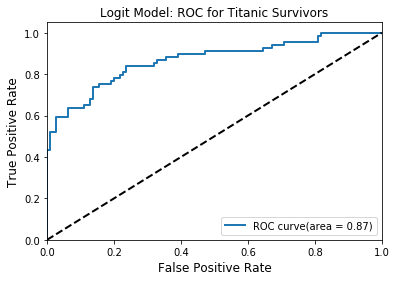

In [17]:
y_score = logit.predict_proba(testdata_X)[:,1]

# ROC Curve
FPR, TPR, _ = roc_curve(testdata_y, y_score)
ROC_AUC = auc(FPR, TPR)
#print('ROC AUC: ',round(ROC_AUC,2))
plt.figure(figsize =[6,4])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Logit Model: ROC for Titanic Survivors', fontsize= 12)
plt.legend(loc="lower right")
plt.show()

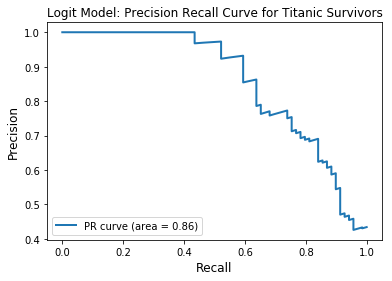

In [18]:
y_score = logit.predict_proba(testdata_X)[:,1]

# Precision-recall Curve
precision, recall, _ = precision_recall_curve(testdata_y, y_score)
PR_AUC = auc(recall, precision)
#print('PR AUC: ',round(PR_AUC,2))
plt.figure(figsize=[6,4])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Logit Model: Precision Recall Curve for Titanic Survivors', fontsize=12)
plt.legend(loc="lower left")
plt.show()

Logistic regression is simple predictive analysis which is used to explain the relationship between one dependent binary variable and one or more independent variables. It is a linear classifier because our outcome depends on the additivity of the parameters. The decision boundry is linear. We can see following figures:

<img src = "1.png" width = 450>
<img src = "2.png" width = 450>
<img src = "3.png" width = 450>
<img src = "4.png" width = 450>
<img src = "6.png" width = 450>
<img src = "5.png" width = 450>

Well, after using simple logistic regression, let's consider a little bit deeper. Is it optimal to use just purely linear logistic regression? How about adding some quadratic terms? Maybe polynomial logistic regression is a good idea, but we need to deal with overfitting problem, so we will apply ridge regression/LASSO to regularize logistic regression.

We introduced Ridge Regression/LASSO in 'House sale in King County' project. 

In Ridge Regression we suppose coefficients are independent normally distributed random variables, we apply L2-norm to penalize the fits with large coefficients to prevent overfitting. Regularizor Lambda helps us balance how well function fits data and magnitude of coefficients.
<img src = "L2regularizedLogit.png" width = 450>
<img src = "simpleLikelihood1.png" width = 300>

**How do we pick Lambda:**  For large training dataset, we use validation set. For small training dataset, we use cross-validation

<img src = "ridgetradeoff.png" width = 300>

In LASSO, we suppose coefficients follow Laplace distribution and apply L1-norm to sparse some coefficients to 0. Lambda balanced fit and sparsity.
<img src = "lassoequation.png" width = 350>



In [19]:
Train_quadratic = Train.set_index('PassengerId')
Train_quadratic.head()

,Age,Fare,Survived,NumFamily,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,
1,0.273456,0.014151,0,1,1,0,1,0,0,0,1,0,1
2,0.473882,0.139136,1,1,0,0,0,1,0,0,0,0,0
3,0.323563,0.015469,1,0,0,1,0,0,0,0,1,0,1
4,0.436302,0.103644,1,1,0,0,0,1,0,0,1,0,0
5,0.436302,0.015713,0,0,1,0,1,0,0,0,1,0,1


In [20]:
traindata_quadr, testdata_quadr = train_test_split(Train_quadratic, random_state=0,train_size = 0.8)

traindata_quadr_X = traindata_quadr[['Age', 'Fare', 'NumFamily', 'Sex_male', 'Title_Miss',
                                     'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
                                     'Embarked_S','Pclass_2', 'Pclass_3']]
traindata_quadr_y = traindata_quadr.Survived

testdata_quadr_X = testdata_quadr[['Age', 'Fare', 'NumFamily', 'Sex_male', 'Title_Miss',
                                   'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
                                   'Embarked_S','Pclass_2', 'Pclass_3']]
testdata_quadr_y = testdata_quadr.Survived

In [21]:
## Method 1: Tuning Parameters
params_logreg = [{'C': [0.0001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100], 'penalty': ['l1','l2']}]
grid_logreg = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = params_logreg,
                           scoring = 'accuracy',
                           cv = 10)
poly_degree = 1
print('poly_degree = 1')
poly = PolynomialFeatures(poly_degree)
X_train_poly = poly.fit_transform(traindata_quadr_X)
grid_logreg = grid_logreg.fit(X_train_poly, traindata_quadr_y)
best_acc_logreg1 = grid_logreg.best_score_
best_params_logreg1 = grid_logreg.best_params_
print(round(best_acc_logreg1,3))
print(best_params_logreg1)
poly_degree = 2
print('poly_degree = 2')
poly = PolynomialFeatures(poly_degree)
X_train_poly = poly.fit_transform(traindata_quadr_X)
grid_logreg = grid_logreg.fit(X_train_poly, traindata_quadr_y)
best_acc_logreg2 = grid_logreg.best_score_
best_params_logreg2 = grid_logreg.best_params_
print(round(best_acc_logreg2,3))
print(best_params_logreg2)
poly_degree = 3
print('poly_degree = 3')
poly = PolynomialFeatures(poly_degree)
X_train_poly = poly.fit_transform(traindata_quadr_X)
grid_logreg = grid_logreg.fit(X_train_poly, traindata_quadr_y)
best_acc_logreg3 = grid_logreg.best_score_
best_params_logreg3 = grid_logreg.best_params_
print(round(best_acc_logreg3,3))
print(best_params_logreg3)

poly_degree = 1
0.831
{'C': 1, 'penalty': 'l1'}
poly_degree = 2
0.837
{'C': 1, 'penalty': 'l2'}
poly_degree = 3
0.836
{'C': 0.3, 'penalty': 'l2'}


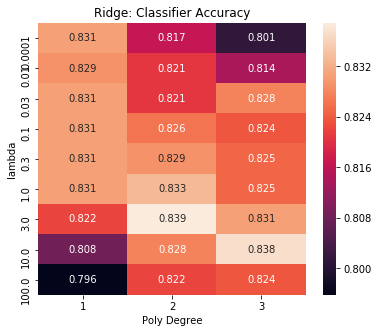

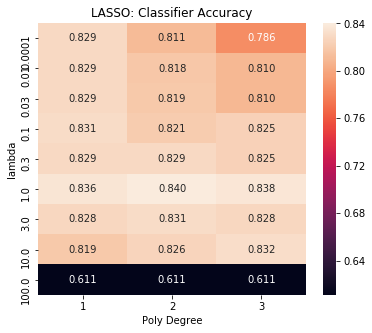

In [22]:
# Method 2: Heatmap

######################################### Ridge #############################################
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

n_splits = 10
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.1, random_state=0)

X = traindata_quadr_X.values[0::, 0::]
y = traindata_quadr_y.values

log_cols = ["lambda", "Poly Degree", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for train_index, vali_index in sss.split(X, y):
    X_train, X_vali = X[train_index], X[vali_index]
    y_train, y_vali = y[train_index], y[vali_index]


#    for lambd in np.linspace(1.0e-100,100,num = 15):
    for lambd in [0.0001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100]:
        for poly_degree in range(1,4):
            
            # Create polynomial features
            poly = PolynomialFeatures(poly_degree)
            X_train_poly = poly.fit_transform(X_train)
            X_vali_poly = poly.fit_transform(X_vali)

            clf = LogisticRegression(C=1/lambd,penalty='l2')        
            clf.fit(X_train_poly, y_train)
            train_predictions = clf.predict(X_vali_poly)
            acc = accuracy_score(y_vali, train_predictions)
            if lambd in acc_dict:
                if poly_degree in acc_dict[lambd]:
                    acc_dict[lambd][poly_degree] += acc
                else:
                    acc_dict[lambd][poly_degree] = acc
            else:
                acc_dict[lambd] = {}
                acc_dict[lambd][poly_degree] = acc


for lambd in acc_dict:
    for poly_degree in acc_dict[lambd]:
        acc_value = acc_dict[lambd][poly_degree] / n_splits
        log_entry = pd.DataFrame([[lambd, poly_degree, acc_value]], columns=log_cols)
        log = log.append(log_entry)

#print ('Classifier Accuracy')
#print (log)
#print ()

plt.figure(figsize=(6,5))

plt.xlabel('Accuracy')
plt.title('Ridge: Classifier Accuracy')

heatmap_data = log.pivot("lambda", "Poly Degree", "Accuracy")
ax = sns.heatmap(heatmap_data, annot=True, fmt='.3f')

######################################### LASSO #############################################
log_cols = ["lambda", "Poly Degree", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for train_index, vali_index in sss.split(X, y):
    X_train, X_vali = X[train_index], X[vali_index]
    y_train, y_vali = y[train_index], y[vali_index]


#    for lambd in np.linspace(1.0e-100,100,num = 15):
    for lambd in [0.0001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100]:
        for poly_degree in range(1,4):
            
            # Create polynomial features
            poly = PolynomialFeatures(poly_degree)
            X_train_poly = poly.fit_transform(X_train)
            X_vali_poly = poly.fit_transform(X_vali)

            clf = LogisticRegression(C=1/lambd,penalty='l1')        
            clf.fit(X_train_poly, y_train)
            train_predictions = clf.predict(X_vali_poly)
            acc = accuracy_score(y_vali, train_predictions)
            if lambd in acc_dict:
                if poly_degree in acc_dict[lambd]:
                    acc_dict[lambd][poly_degree] += acc
                else:
                    acc_dict[lambd][poly_degree] = acc
            else:
                acc_dict[lambd] = {}
                acc_dict[lambd][poly_degree] = acc


for lambd in acc_dict:
    for poly_degree in acc_dict[lambd]:
        acc_value = acc_dict[lambd][poly_degree] / n_splits
        log_entry = pd.DataFrame([[lambd, poly_degree, acc_value]], columns=log_cols)
        log = log.append(log_entry)

#print ('Classifier Accuracy')
#print (log)
#print ()

plt.figure(figsize=(6,5))

plt.xlabel('Accuracy')
plt.title('LASSO: Classifier Accuracy')

heatmap_data = log.pivot("lambda", "Poly Degree", "Accuracy")
ax = sns.heatmap(heatmap_data, annot=True, fmt='.3f')

We apply two different methods to find the optimal Lambda and Poly degree as above. 

**As we finished splitting 'Train_quadratic' into training part ‘traindata_quadr’ and test part ‘testdata_quadr’, In both methods, we then randomly assign 'traindata_quadr' set into 10 groups equally. Each time, we use one of 10 groups as validation set, treat all the remaining data left in 'traindata_quadr' set as training set. For every value of lambda, we do a procedure as follows: For i from 1 to 10, estimate parameters in the training set, compute accuracy in the validation set. Calculate final accuracy as the mean of these 10 accuracy for this particular lambda. Repeat this procedure for each choice of lambda, we will have many accuracy based on different lambda. So we choose the lambda which maximized the accuracy. Using the Lambda selected and the 'testdata_quadr' set, we can do prediction and evaluation.**
 
Because the splitting training/ validation set methods are different, two methods return us different result. 

In method 1, When Lambda = 1 and Poly Degree = 2, Logistic Ridge regression returns the largest accuracy.

In method 2, When Lambda = 1 and Poly Degree = 2, Logistic LASSO returns the largest accuracy.

Even though the results are different, we can have one same conclusion: **Purely linear logistic regression is not the optimal choice.** We prefer to use polynomial logistic regression(degree = 2) as our model in this section. Let's do prediction and evaluation using 'testdata_quadr' set as follows:

In [23]:
params_logreg = [{'C': [0.0001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100], 'penalty': ['l1','l2']}]
grid_logreg = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = params_logreg,
                           scoring = 'accuracy',
                           cv = 10)
poly_degree = 2
print('poly_degree = 2')
poly = PolynomialFeatures(poly_degree)
X_train_poly = poly.fit_transform(traindata_quadr_X)
grid_logreg = grid_logreg.fit(X_train_poly, traindata_quadr_y)
best_acc_logreg2 = grid_logreg.best_score_
best_params_logreg2 = grid_logreg.best_params_
print('Best Accuracy: ',round(best_acc_logreg2,3))
print('Best Parameters: ',best_params_logreg2)
print('-----------------------------------------------------------')

X_test_poly = poly.fit_transform(testdata_quadr_X)
y_pred = grid_logreg.best_estimator_.predict(X_test_poly)

logit_accy = round(accuracy_score(y_pred, testdata_quadr_y), 3)
print('Confusion Matrix: ')
print(pd.crosstab(testdata_quadr_y, y_pred)) # Confusion matrix
#print( confusion_matrix(Test_y, y_pred))
print('-----------------------------------------------------------')
print("Accuracy: ",round(logit_accy * 100,2),'%')
print('-----------------------------------------------------------')
print("Precision: ", round(precision_score(testdata_quadr_y, y_pred),2))
print('-----------------------------------------------------------')
print("Recall: ",round(recall_score(testdata_quadr_y, y_pred),2))
print('-----------------------------------------------------------')
print('F1 Score: ',round(f1_score(testdata_quadr_y, y_pred),2))

poly_degree = 2
Best Accuracy:  0.837
Best Parameters:  {'C': 1, 'penalty': 'l2'}
-----------------------------------------------------------
Confusion Matrix: 
col_0      0   1
Survived        
0         98  12
1         21  48
-----------------------------------------------------------
Accuracy:  81.6 %
-----------------------------------------------------------
Precision:  0.8
-----------------------------------------------------------
Recall:  0.7
-----------------------------------------------------------
F1 Score:  0.74


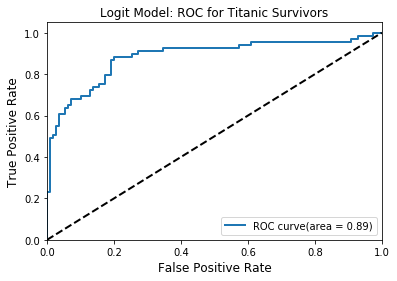

In [24]:
y_score = grid_logreg.predict_proba(X_test_poly)[:,1]

# ROC Curve
FPR, TPR, _ = roc_curve(testdata_quadr_y, y_score)
ROC_AUC = auc(FPR, TPR)
#print('ROC AUC: ',round(ROC_AUC,2))
plt.figure(figsize =[6,4])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Logit Model: ROC for Titanic Survivors', fontsize= 12)
plt.legend(loc="lower right")
plt.show()

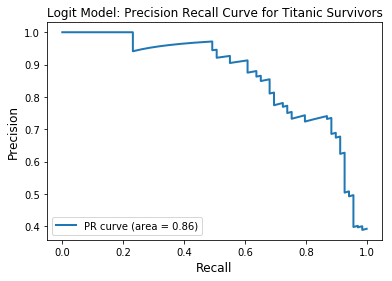

In [25]:
y_score = grid_logreg.predict_proba(X_test_poly)[:,1]

# Precision-recall Curve
precision, recall, _ = precision_recall_curve(testdata_quadr_y, y_score)
PR_AUC = auc(recall, precision)
#print('PR AUC: ',round(PR_AUC,2))
plt.figure(figsize=[6,4])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Logit Model: Precision Recall Curve for Titanic Survivors', fontsize=12)
plt.legend(loc="lower left")
plt.show()

All evaluation metrics are better than metrics of purely linear logistic regression! The result comfirm what we thought. 

#### 3.6.3 Decision Tree
Use tree-based methods to segment the predictor space into a number of simple regions, so that we can do regression/classfication and get the prediction, this method is called **Decision Tree**. Each **internal node** corresponds to an attribute, each **leaf node** corresponds to a class label. For example, if we want to predict whether loaning money to a people is safe or risky based on his credit, income, personal information(age, gender, etc.) and term(3-year-loan, 5-year-loan, etc.), we can build a decision tree.
If some input xi is given, we can traverse the decision tree down the particular branches of the input and make a prediction. OK, but how to build a decision tree? 
We start an empty tree, select a feature to split training data into subsets. In each subset, there will be some safety and some risky in it.
<img src = "split.png" width = 350>
Repeat above step on each subsets until leaf nodes are found in all branches of the tree and nothing more to split. After building a tree, we can do prediction on each leaf node by using majority vote. If majority of data has risky associate with it, we predict it will be risky to loan money in this situation. Otherwise, if majority has safety, we predict safty in this situation.
<img src = "buildtree.png" width = 250>
However, how to determine 'best attribute' during each splitting? how to find the best tree among a large number of possible trees? 
<img src = "bestattribute.png" width = 450>
Let's introduce two metrics **Gini Index** and **Information Gain** first. 

##### Gini Index

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified. It is calculated as the probability of mislabelling an element assuming that the element is randomly labelled according the the distribution of all the classes in the set. If all cases in a node fall into a single category, gini index will be 0. An attribute with lower gini index should be preferred.
<img src = "example1.png" width = 550>
<img src = "example2.png" width = 550>
<img src = "example3.png" width = 550>
<img src = "example4.png" width = 350>

##### Information Gain

Information Gain calculates the expected reduction in entropy due to sorting on the attribute. We use entropy to estimate the information contained by each attribute. **Entropy** measure the randomness or uncertainty. If all cases in a node fall into a single category, entropy is 0. If half half, then entropy is 1.  An attribute with larger information gain should be placed as a root position.
<img src = "example11.png" width = 550>
<img src = "example12.png" width = 550>
<img src = "example13.png" width = 550>
<img src = "example14.png" width = 550>
<img src = "example15.png" width = 350>
##### These metrics will calculate values for every attribute, we choose the attribute with the best metrics during each splitting. i.e, the attribute with a high value of information gain or small value of gini purity will be chosen.
The completed decision tree of this example is shown as follows:
<img src = "finaldecision.png" width = 350>
We can see when the algorithm is going deeper and deeper(depth increases), as the complexity of decision boundary increases, the training error is reduced, however, the test error will be increased. An issue of **Overfitting** will occur. 
<img src = "overfittingdecision.png" width = 300>
To avoid overfitting problem, we need to pick a best depth for a decision tree by pruning the tree, we grow a tree which is bigger than what we need, after the algorithm terminates, we chop off parts that turn out to be less important. Our goal of tree pruning is to balance **how well the tree fits the data** and **complexity of the tree**.
<img src = "costtreepruning.png" width = 300>

In python sklearn decision tree method, we can do parameter tuning on many parameters, the primary ones are 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features' and so on. 

* 'max_depth': indicates how deep the tree can be.
* 'min_samples_split': the minimum number of samples required to split an internal node.
* 'min_samples_leaf': the minimum number of samples required to be at a leaf node
* 'max_features': the number of features to consider when looking for the best split

A good way to find the optimal combination of parameters is to iterate through all the possible parameters and measure the evaluation metric with **Cross Validation**. In K-fold CV method, we randomly assign Nontest set into K groups equally. Each time, we use one of K groups as validation set, treat all the remaining data left in Nontest set as training set. For every parameters, we grow decision tree in training data and calculate evaluation matric(accuracy) in validation set, then calculate the mean of accuracies from k trials as accuracy of this particular parameter. Go through all parameters, we can find the best one with the optimal evaluation matric. Using the combination of parameters in test set, we can do prediction and evaluation of decision tree algorithm.
<img src = "codeKfold1.png" width = 650>
<img src = "codeKfold2.png" width = 450>
<img src = "codeKfold3.png" width = 450>
To search to tune parameter is to use **Grid Search** in python. Basically, it explores a range of parameters and finds the best combination of parameters. As decision tree is not sensitive to normal transformation, we will split our data from the very begining using 'Data1'.

In [32]:
Data1.head()

,PassengerId,Age,Fare,Survived,NumFamily,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,7.2500,0,1,1,0,1,0,0,0,1,0,1
1,2,38.0,71.2833,1,1,0,0,0,1,0,0,0,0,0
2,3,26.0,7.9250,1,0,0,1,0,0,0,0,1,0,1
3,4,35.0,53.1000,1,1,0,0,0,1,0,0,1,0,0
4,5,35.0,8.0500,0,0,1,0,1,0,0,0,1,0,1


In [34]:
Testlist = TestIndex.Index.tolist()
Traintree = Data1.loc[~Data1.PassengerId.isin(Testlist)]
Testtree = Data1.loc[Data1.PassengerId.isin(Testlist)]
print('Dimension of trainset is',Traintree.shape)#891 x 14
print('Dimension of testset is: ',Testtree.shape)#418 x 14
Traintree.dtypes.index

Dimension of trainset is (891, 14)
Dimension of testset is:  (418, 14)


Index(['PassengerId', 'Age', 'Fare', 'Survived', 'NumFamily', 'Sex_male',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [38]:
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,10),
              'criterion':['gini','entropy']}
clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid, scoring='accuracy',n_jobs=5)
X =  Traintree.drop(["PassengerId","Survived"],axis=1)
Y = Traintree["Survived"]
tree_search.fit(X,Y)

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

Tree best parameters : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 40}
Tree best estimator : DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Tree best score : 0.8125701459034792


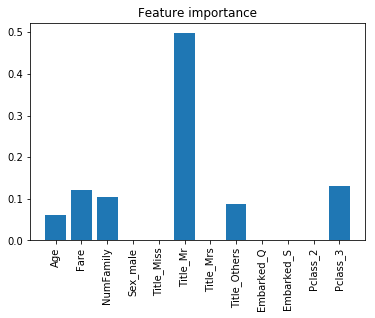

In [45]:
tree_best_parameters = tree_search.best_params_
tree_optimized = tree.DecisionTreeClassifier(**tree_best_parameters)
tree_optimized.fit(X,Y)

train_columns = list(Traintree.columns)
train_columns.remove("PassengerId")
train_columns.remove("Survived")

fig, ax = plt.subplots( figsize=(6,4))
ax.bar(range(len(X.columns)),tree_optimized.feature_importances_ )
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
ax.set_title("Feature importance")
plt.show()

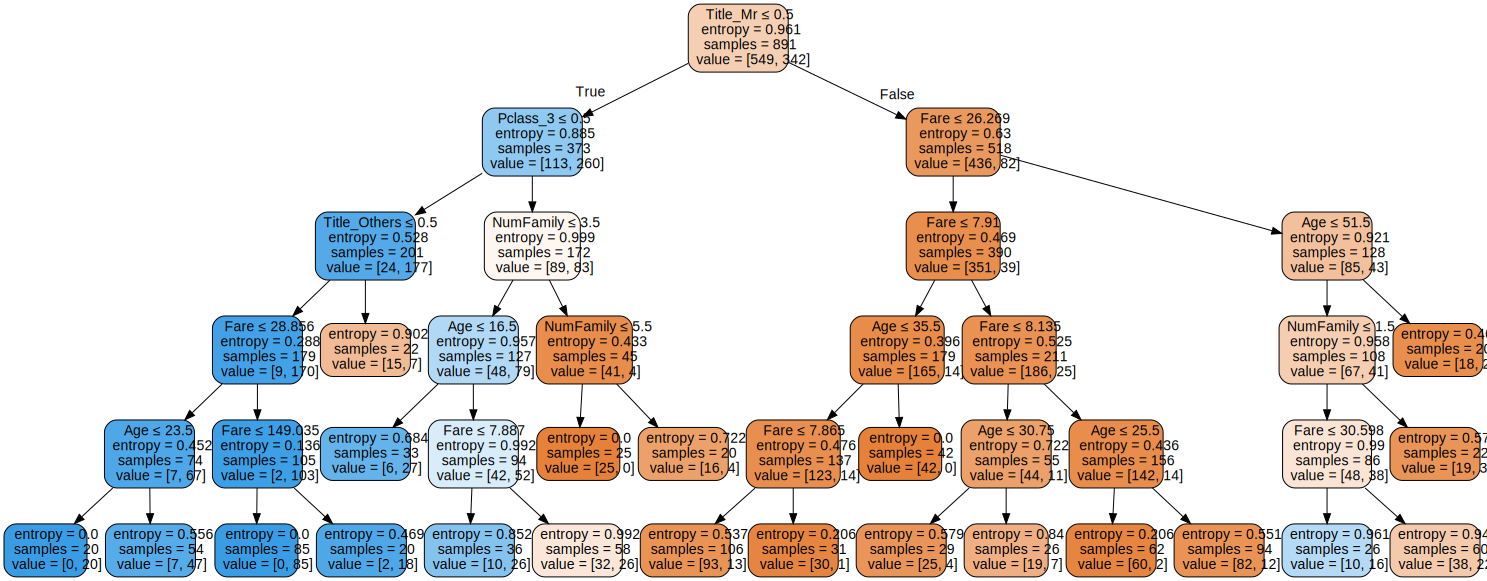

In [53]:
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(tree_optimized, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 

#graph = pydotplus.graph_from_dot_data(dot_data)
#graph.set_size('"5,5!"')
#graph.write_png('resized_tree.png')
graph = graphviz.Source(dot_data)
graph


In [57]:
testtreeX = Testtree.drop(["PassengerId","Survived"],axis=1)
y_pred = tree_optimized.predict(testtreeX)
prediction = pd.DataFrame({"PassengerId":Testtree["PassengerId"],
                           "Survived":y_pred})

prediction.head()
#prediction.to_csv("Titanic_tree_prediction.csv",index=False)

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,0


In [58]:
Dtree_accy = round(accuracy_score(y_pred, Testtree['Survived']), 3)
print('Confusion Matrix: ')
print(pd.crosstab(Testtree['Survived'], y_pred)) # Confusion matrix
#print( confusion_matrix(Test_y, y_pred))
print('-----------------------------------------------------------')
print("Accuracy: ",round(logit_accy * 100,2),'%')
print('-----------------------------------------------------------')
print("Precision: ", round(precision_score(Testtree['Survived'], y_pred),2))
print('-----------------------------------------------------------')
print("Recall: ",round(recall_score(Testtree['Survived'], y_pred),2))
print('-----------------------------------------------------------')
print('F1 Score: ',round(f1_score(Testtree['Survived'], y_pred),2))

Confusion Matrix: 
col_0       0    1
Survived          
0         242   24
1          37  115
-----------------------------------------------------------
Accuracy:  81.6 %
-----------------------------------------------------------
Precision:  0.83
-----------------------------------------------------------
Recall:  0.76
-----------------------------------------------------------
F1 Score:  0.79


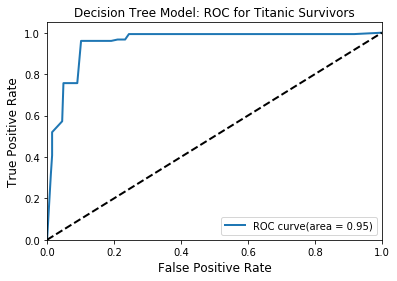

In [62]:
y_score = tree_optimized.predict_proba(testtreeX)[:,1]

# ROC Curve
FPR, TPR, _ = roc_curve(Testtree['Survived'], y_score)
ROC_AUC = auc(FPR, TPR)
#print('ROC AUC: ',round(ROC_AUC,2))
plt.figure(figsize =[6,4])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Decision Tree Model: ROC for Titanic Survivors', fontsize= 12)
plt.legend(loc="lower right")
plt.show()

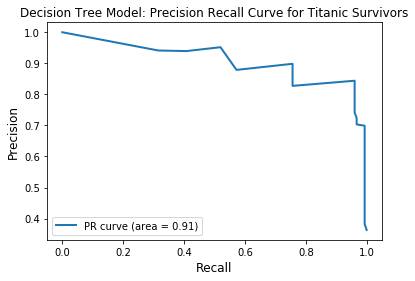

In [63]:
y_score = tree_optimized.predict_proba(testtreeX)[:,1]

# Precision-recall Curve
precision, recall, _ = precision_recall_curve(Testtree['Survived'], y_score)
PR_AUC = auc(recall, precision)
#print('PR AUC: ',round(PR_AUC,2))
plt.figure(figsize=[6,4])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Decision Tree Model: Precision Recall Curve for Titanic Survivors', fontsize=12)
plt.legend(loc="lower left")
plt.show()

From evaluation metrics shown above, we find both ROC and PRAUC are even better than logistic regression. it seems our decision tree really did a good job!

To summarize, let's think about the pros and cons of decision tree algorithm:
##### Advantages
* Easy to interpret and make for straightforward visualizations.
* Can handle both numerical and categorical data.
* Are extremely fast.
##### Disadvantages
* There is a high probability of overfitting in Decision Tree. **Bias** represents training error, **Variance** represents test error minors training error. From the figure shown above we can see, as depth increases, bias increases rapidly, variance increases as well.
<img src = "overfittingdecision.png" width = 300>

If we want to set a max depth to deal with overfitting, this will be at the expense of error due to bias. Besides, a simpler model with less variance may not be a strong predictive model. To ont only reduce the variance but also increase the prediction accuracy, we consider to use some other algorithms, such as random forest.

#### 3.6.4 Random Forest
